In [19]:
import pandas as pd
import sqlite3
import numpy as np
import base64
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
conn = sqlite3.connect('CharactersDatabase.db')


In [21]:
df = pd.read_sql("SELECT * FROM characters", conn)
conn.close()

In [22]:
def processImage(img):
    buffer = np.frombuffer(img, dtype=np.uint8)
    img_decoded = cv2.imdecode(buffer, cv2.IMREAD_COLOR)
    grayscale = cv2.cvtColor(img_decoded, cv2.COLOR_BGR2GRAY)
    return grayscale

In [23]:
df['OriginalIm'] = df['image'].apply(processImage)

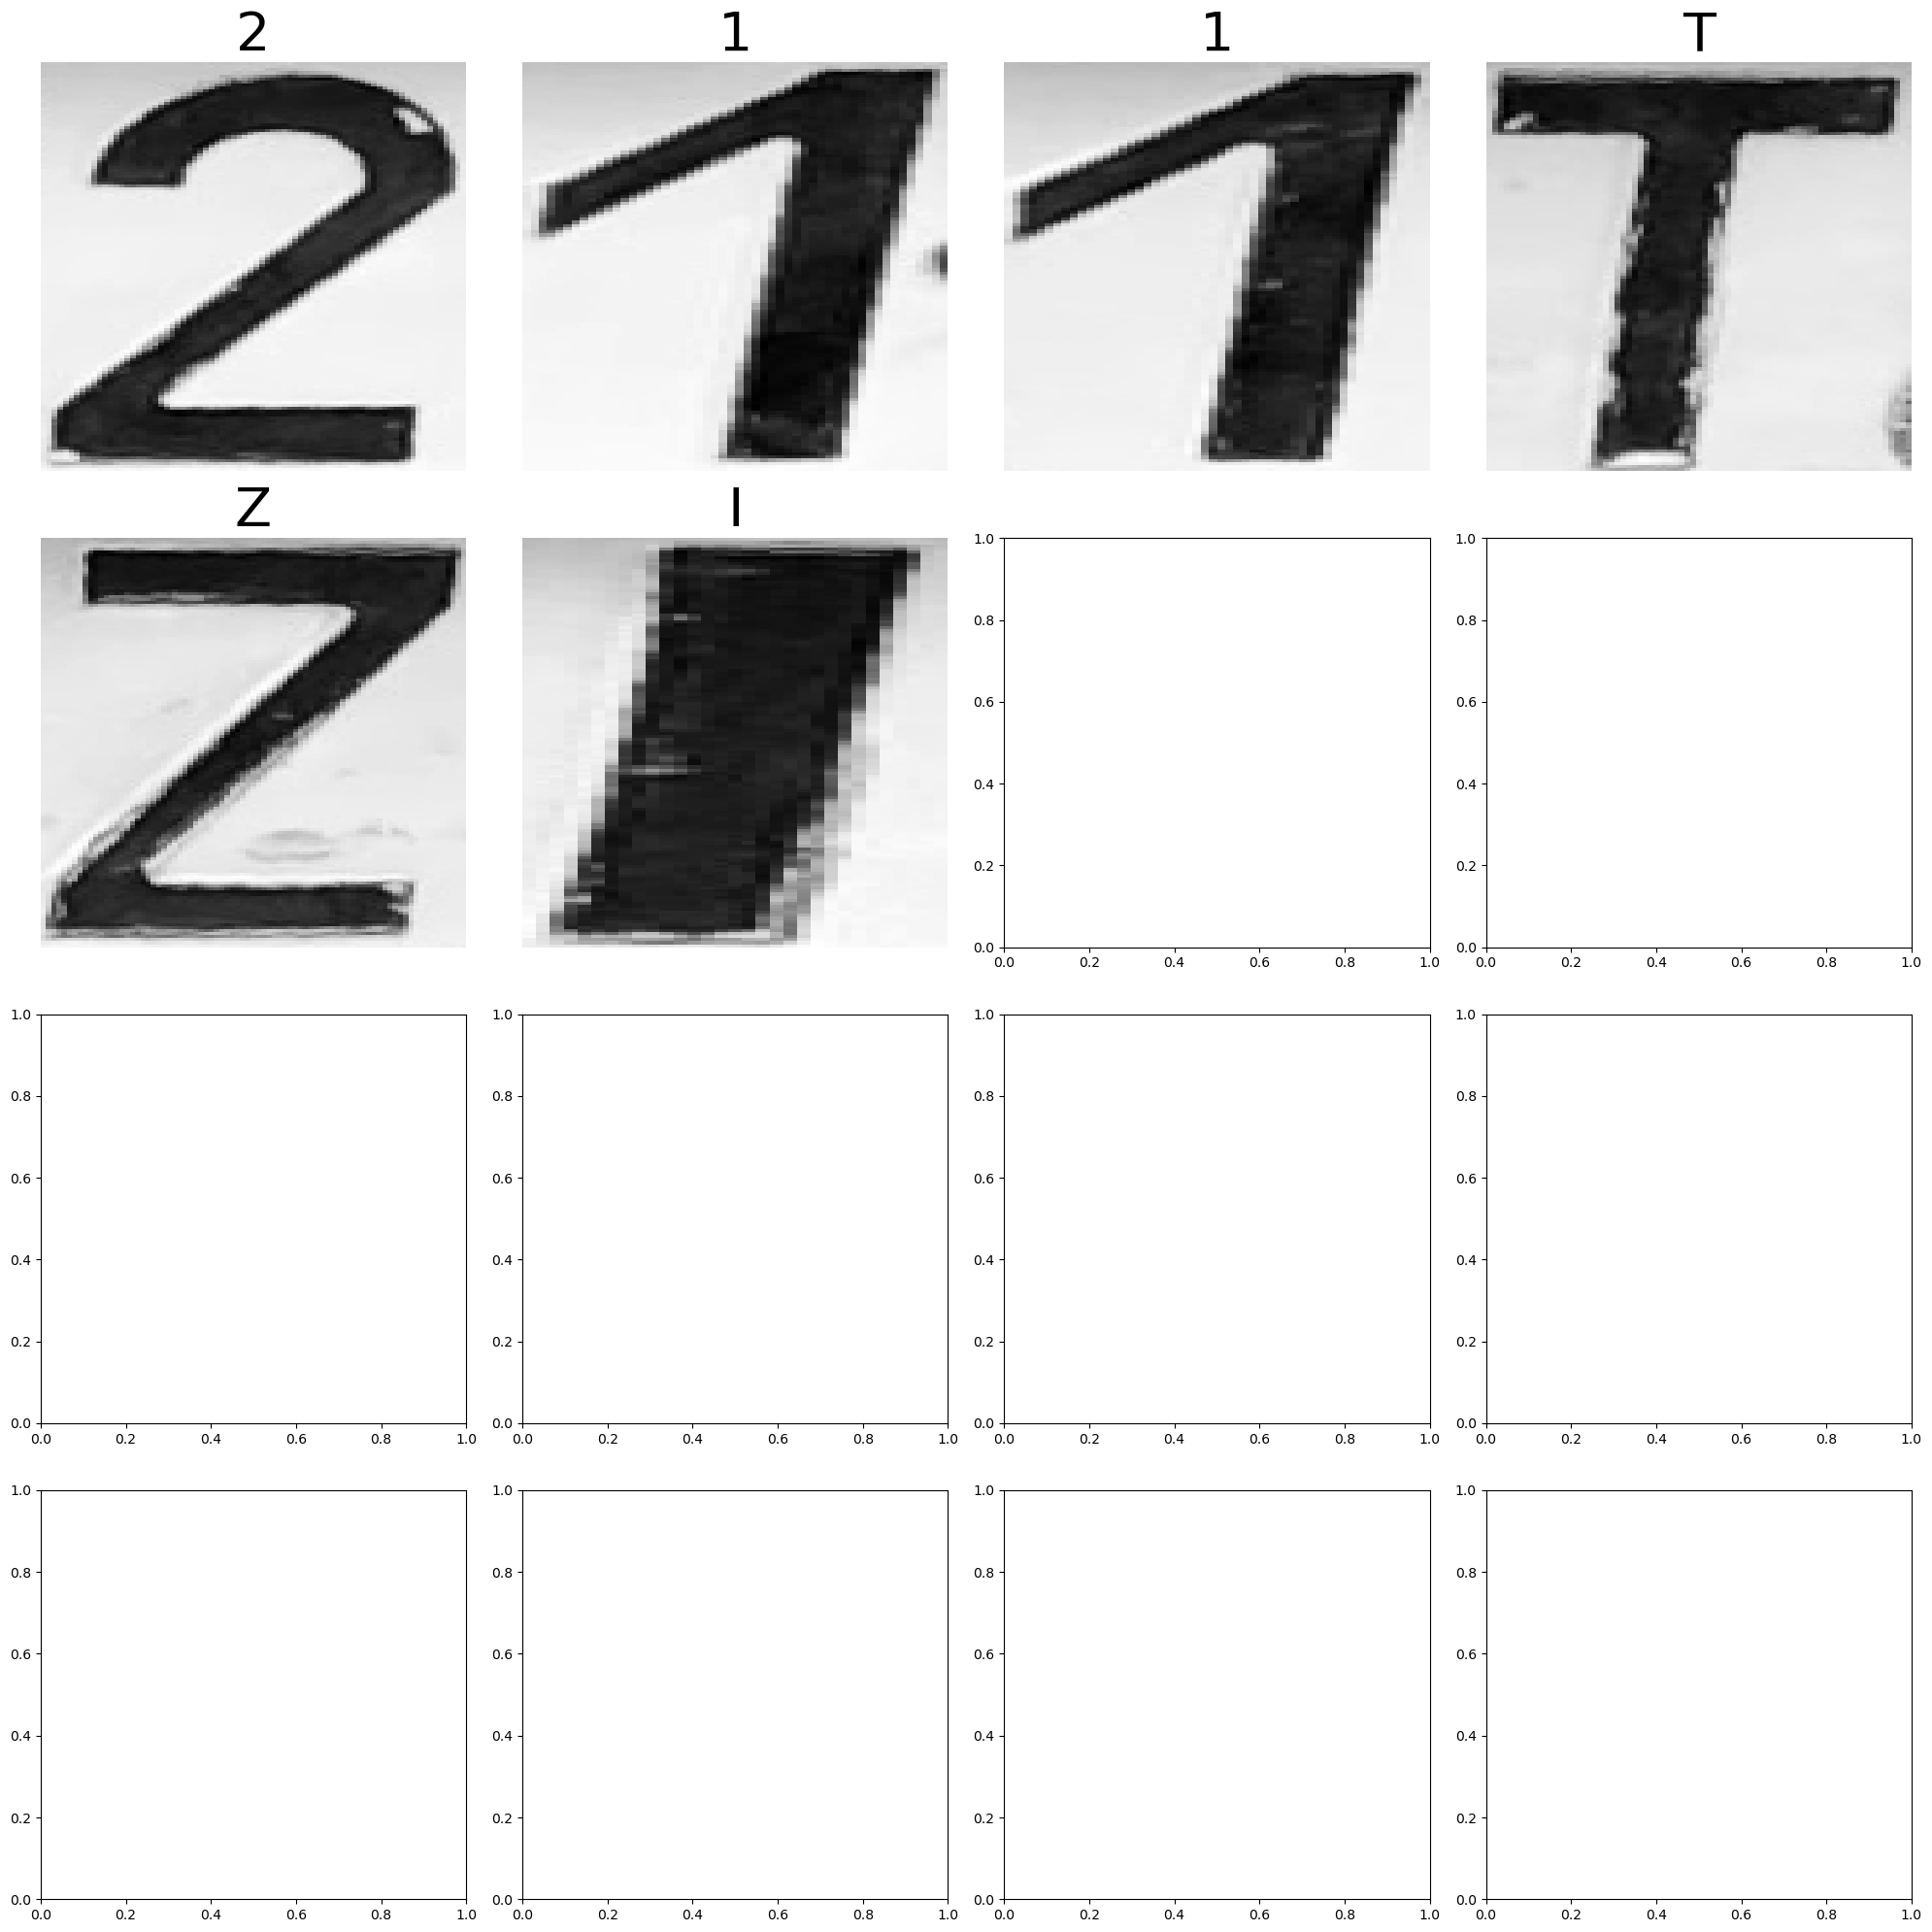

In [24]:
# Determine the number of rows and columns for the grid based on the length of df
num_images = len(df)
num_cols = 4  # Adjust the number of columns as needed
num_rows = (num_images + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
j=0
# Iterate through the DataFrame to plot each heatmap
for i, (index, row) in enumerate(df.iterrows()):
    if((row['label']!='-1') and (row['label']!='-')):
        ax = axes[j // num_cols, j % num_cols]  # Get the current axis
        sns.heatmap(row['OriginalIm'], cmap='gray', cbar=False, ax=ax)  # Plot the heatmap
        ax.set_title(row['label'], fontsize=40)  # Set the title to the label of the image
        ax.axis('off')  # Turn off axis
        j+=1
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()